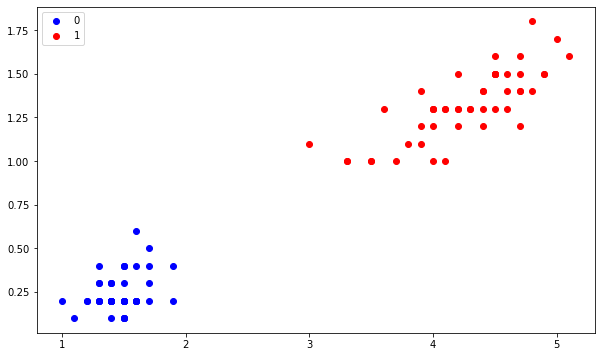

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
data_size = X.shape[0]

In [8]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict(X, theta):    
    h = sigmoid_function(np.dot(X, theta))
    return h

lr = 0.5
num_iter = 100

theta = np.array([0.1, 0.5, -0.1])

losses = []
accs   = []

for epoch in range(num_iter):
    for i in range(data_size):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
    
        z = np.dot(xi, theta)
        y_hat = sigmoid_function(z)

        loss = loss_function(y_hat, yi)

        # compute mean of gradient
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size

        theta -= lr*gradient

        if(i % 1 == 0):
            # loss
            losses.append(loss)

            # accuracy
            preds = predict(xi, theta).round()
            acc = (preds == yi).mean()
            accs.append(acc)

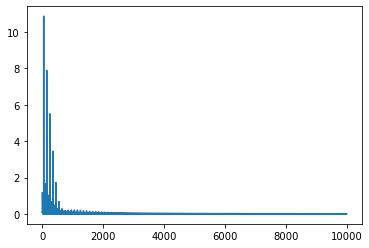

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

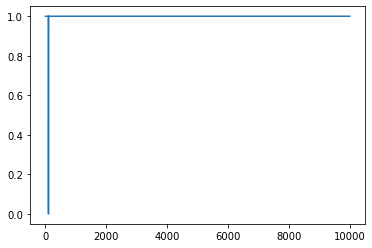

In [10]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.show()